# $t$-test (difference between two means): Coins

In [1]:
from src.data import Load
from scipy.stats import t, ttest_ind, probplot, normaltest
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sample = Load.coins()

## Plan

- Introduction
- Hypotheses
    - $H_{0}: \overline{\mu}_{D} = 0$
    - $H_{1}: \overline{\mu}_{D} \neq 0$
- Method
    - Normality checked
    - Common var checked
    - Mean and 95% t-interval
    - $t$-test of the difference between population means

## Summary

## Introduction

This report examines twelfth-century Byzantine coins minted during different periods of the reign of Manuel I Comnenus, specifically the question whether the average silver content in the coins changed throughout his reign.
Data was provided on the silver content of 16 coins: 9 from one period and 7 from another.

It should be noted that the what years of the reign the two periods referred to was not stated, and the unit of measurement of the silver content is unknown.

## Hypotheses

Let $X_{1}, X_{2}$ represent the silver content found in coins minted in periods one and two, respectively, an let $D = X_{1} - X_{2}$ be the difference in silver content.
Then let the hypotheses be

$$
\begin{aligned}
  &H_{0} : \mu_{D} = 0, \\
  &H_{1} : \mu_{D} \neq 0.
\end{aligned}
$$

## Method

The normality of the two samples was checked using a normal probability plot and a check of a common sample variance was carried out.
A 95% $t$-interval of each sample was calculated, and a $t$-test was used to test the null hypothesis that the mean difference in silver content is zero.
All analyses were done in **Python**.

## Results

The distributions of the silver content of each sample are displayed in boxplots below. The normality of each sample were checked and by a normal probability, and the assumption of a common sample variance was checked (see **Notes**).

In [3]:
plt_melt = sample.melt(
    value_vars=["Coin1", "Coin4"],
    var_name="Period",
    value_name="Silver"
)

plt_melt.dropna(inplace=True)

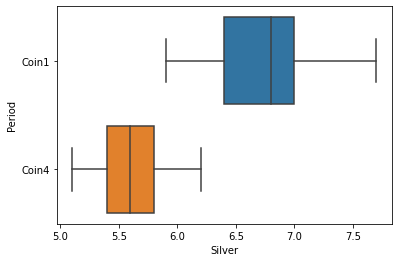

In [13]:
ax = sns.boxplot(
    data=plt_melt,
    x="Silver",
    y="Period"
)

plt.show()

The mean silver content in coins from period one was 6.74, with 95% $t$-interval (6.67, 6.82), and the mean silver content in coins from period two was 5.61, with 95% $t$-interval (5.580, 5.65).
A $t$-test of the hypothesis of equal means gave $t =$ 4.72 on 14 degrees of freedom, with p-value of 0.00032.

## Discussion

Given $p <$ 0.001, there is very strong evidence against the null hypothesis of equal means.
We therefore reject the null hypothesis at the 0.1% signfircance level, and conclude that there is strong evidence that the coins in periods one and four of Manuel I Comnenus reign over the Byzantine Empire did not have an equal mean silver content.
Given the data, it seems likely that period one's coins had on average more silver in them than coins from period two.

## Notes

Descriptive table

In [5]:
sample.describe()

,Coin1,Coin2,Coin3,Coin4
count,9.000000,7.000000,4.000,7.000000
mean,6.744444,8.242857,4.875,5.614286
std,0.543395,1.099784,0.450,0.362531
min,5.900000,6.600000,4.500,5.100000
25%,6.400000,7.500000,4.575,5.400000
50%,6.800000,8.600000,4.750,5.600000
75%,7.000000,9.100000,5.050,5.800000
max,7.700000,9.300000,5.500,6.200000


Probability plots

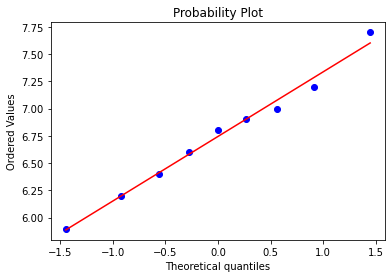

In [6]:
# Coin2
f, ax = plt.subplots()
probplot(
    x=sample["Coin1"].dropna(),
    plot=ax
)
plt.show()

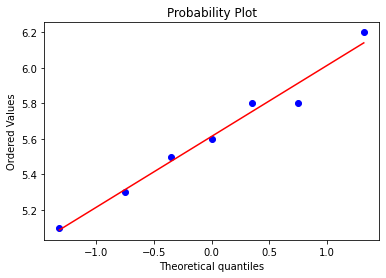

In [7]:
# Coin4
f, ax = plt.subplots()
probplot(
    x=sample["Coin4"].dropna(),
    plot=ax
)
plt.show()

Check of common sample variance

In [8]:
sample["Coin1"].var()/sample["Coin4"].var()

2.2466787439613505

95% t-intervals

In [9]:
sample_dist1 = t(
    df=sample["Coin1"].size-1,
    loc=sample["Coin1"].mean(),
    scale=sample["Coin1"].var()/sample["Coin1"].size
)

sample_dist1.interval(0.95)

(6.668787580384554, 6.820101308504335)

In [10]:
sample_dist4 = t(
    df=sample["Coin4"].size-1,
    loc=sample["Coin4"].mean(),
    scale=sample["Coin4"].var()/sample["Coin4"].size
)

sample_dist4.interval(0.95)

(5.5806107332661785, 5.647960695305249)

t-test on df=14

In [11]:
ttest_ind(
    a=sample["Coin1"],
    b=sample["Coin4"],
    nan_policy="omit"
)

Ttest_indResult(statistic=4.7271976883653455, pvalue=0.00032409788275889563)

In [12]:
help(ttest_ind)

Help on function ttest_ind in module scipy.stats.stats:

ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate', alternative='two-sided')
    Calculate the T-test for the means of *two independent* samples of scores.
    
    This is a two-sided test for the null hypothesis that 2 independent samples
    have identical average (expected) values. This test assumes that the
    populations have identical variances by default.
    
    Parameters
    ----------
    a, b : array_like
        The arrays must have the same shape, except in the dimension
        corresponding to `axis` (the first, by default).
    axis : int or None, optional
        Axis along which to compute test. If None, compute over the whole
        arrays, `a`, and `b`.
    equal_var : bool, optional
        If True (default), perform a standard independent 2 sample test
        that assumes equal population variances [1]_.
        If False, perform Welch's t-test, which does not assume equal
        populatio